In [1]:
# Preprocesamiento de Datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Modelado con TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de Im√°genes
import cv2

# Guardado y Carga de Modelos
import joblib
import os

# Otros Recursos √ötiles
import random

In [2]:
# Rutas de Datos
ruta_train_csv = r'C:\Users\mikel\OneDrive\Documentos\TB-DS-BIO-23.09.24\REPOSITORIOS\Mikel\clip_count\train.csv'
ruta_test_csv = r'C:\Users\mikel\OneDrive\Documentos\TB-DS-BIO-23.09.24\REPOSITORIOS\Mikel\clip_count\test.csv'
ruta_train_img = r'C:\Users\mikel\OneDrive\Documentos\TB-DS-BIO-23.09.24\REPOSITORIOS\Mikel\clip_count\train'
ruta_test_img = r'C:\Users\mikel\OneDrive\Documentos\TB-DS-BIO-23.09.24\REPOSITORIOS\Mikel\clip_count\test'

# Cargar Datos
df_train = pd.read_csv(ruta_train_csv)
df_test = pd.read_csv(ruta_test_csv)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          15000 non-null  int64
 1   clip_count  15000 non-null  int64
dtypes: int64(2)
memory usage: 234.5 KB


In [4]:
df_train.describe()

id    clip_count
count  15000.000000  15000.000000
mean   37500.500000     37.290133
std     4330.271354     21.922691
min    30001.000000      0.000000
25%    33750.750000     18.000000
50%    37500.500000     37.000000
75%    41250.250000     56.000000
max    45000.000000     75.000000

In [5]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Histograma de la columna clip_count
plt.figure(figsize=(12, 6))
sns.histplot(df_train['clip_count'], bins=50, kde=True, color='skyblue')

# A√±adir detalles al gr√°fico
plt.title('Distribuci√≥n de Clip Count en el Conjunto de Entrenamiento', fontsize=16)
plt.xlabel('N√∫mero de Clips', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gr√°fico
plt.show()


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


In [7]:
df_test.describe()

id
count   5000.000000
mean   47500.500000
std     1443.520003
min    45001.000000
25%    46250.750000
50%    47500.500000
75%    48750.250000
max    50000.000000

In [8]:
# Funci√≥n para mostrar una imagen
def mostrar_imagen(ruta_img, img_id, titulo):
    img_path = os.path.join(ruta_img, f"clips-{img_id}.png")
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen: {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(titulo)
    plt.axis('off')

# Visualizar im√°genes de train y test
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Imagen de train
plt.subplot(1, 2, 1)
mostrar_imagen(ruta_train_img, img_id='30001', titulo='Imagen de Train')

# Imagen de test
plt.subplot(1, 2, 2)
mostrar_imagen(ruta_test_img, img_id='45001', titulo='Imagen de Test')

plt.tight_layout()
plt.show()


In [9]:
# Funci√≥n para obtener informaci√≥n de una imagen
def obtener_info_imagen(ruta_img, img_id):
    img_path = os.path.join(ruta_img, f"clips-{img_id}.png")
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen: {img_path}")
    
    # Tipo de archivo
    extension = os.path.splitext(img_path)[-1]
    
    # Dimensiones de la imagen
    altura, anchura = img.shape[:2]
    
    # Tipo de color
    if len(img.shape) == 3:
        canales = img.shape[2]
        tipo_color = "Color (RGB)" if canales == 3 else "Escala de Grises con Alfa"
    else:
        tipo_color = "Escala de Grises"
    
    # Mostrar resultados
    print(f"Informaci√≥n de la imagen: {img_path}")
    print(f"- Dimensiones: {anchura} x {altura}")
    print(f"- Tipo de archivo: {extension}")
    print(f"- Tipo de color: {tipo_color}")

# Mostrar informaci√≥n de una imagen de entrenamiento y una de prueba
print("Imagen de Entrenamiento:")
obtener_info_imagen(ruta_train_img, img_id='30001')

print("\nImagen de Prueba:")
obtener_info_imagen(ruta_test_img, img_id='45001')


Imagen de Entrenamiento:
Informaci√≥n de la imagen: C:\Users\mikel\OneDrive\Documentos\TB-DS-BIO-23.09.24\REPOSITORIOS\Mikel\clip_count\train\clips-30001.png
- Dimensiones: 256 x 256
- Tipo de archivo: .png
- Tipo de color: Color (RGB)

Imagen de Prueba:
Informaci√≥n de la imagen: C:\Users\mikel\OneDrive\Documentos\TB-DS-BIO-23.09.24\REPOSITORIOS\Mikel\clip_count\test\clips-45001.png
- Dimensiones: 256 x 256
- Tipo de archivo: .png
- Tipo de color: Color (RGB)


In [10]:
# Cargar la imagen
ruta_img = r'C:\Users\mikel\OneDrive\Documentos\TB-DS-BIO-23.09.24\REPOSITORIOS\Mikel\clip_count\train\clips-30007.png'
img = cv2.imread(ruta_img)

if img is None:
    raise FileNotFoundError(f"No se pudo cargar la imagen en la ruta: {ruta_img}")

# Convertir de BGR a RGB para visualizaci√≥n
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.title('Imagen RGB Original')
plt.axis('off')
plt.imshow(rgb)
plt.show()


In [11]:
# Convertir a HSV para una manipulaci√≥n de color m√°s precisa
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Detectar la l√≠nea roja
mask_roja1 = cv2.inRange(hsv, (0, 50, 50), (10, 255, 255))   # Rango para rojo (parte 1)
mask_roja2 = cv2.inRange(hsv, (170, 50, 50), (180, 255, 255)) # Rango para rojo (parte 2)
mask_roja = cv2.bitwise_or(mask_roja1, mask_roja2)

# Transformar la l√≠nea roja a azul (mismo tono de las l√≠neas horizontales)
img[mask_roja > 0] = (255, 0, 0)  # Azul en formato BGR

# Mostrar la imagen con la l√≠nea roja transformada en azul
plt.figure(figsize=(6, 6))
plt.title('L√≠nea Roja Transformada en Azul')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


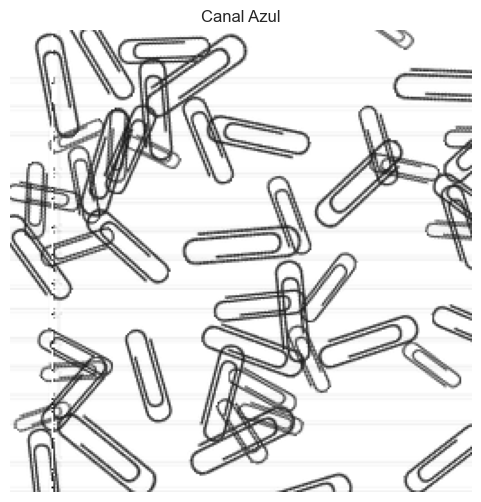

In [12]:
import numpy as np

# Extraer el canal azul
b, g, r = cv2.split(img)

# Mostrar el canal azul
plt.figure(figsize=(6, 6))
plt.title('Canal Azul')
plt.axis('off')
plt.imshow(b, cmap='gray')
plt.show()


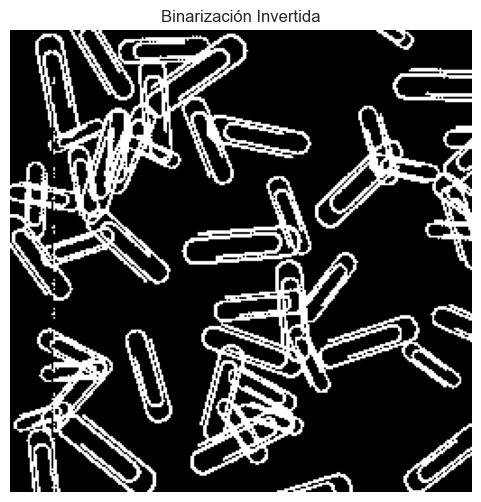

In [13]:
# Aplicar binarizaci√≥n directa
_, thresh = cv2.threshold(b, 225, 255, cv2.THRESH_BINARY)

# Invertir la imagen binarizada
thresh_invertida = 255 - thresh

# Mostrar la binarizaci√≥n invertida
plt.figure(figsize=(6, 6))
plt.title('Binarizaci√≥n Invertida')
plt.axis('off')
plt.imshow(thresh_invertida, cmap='gray')
plt.show()


In [14]:
def transformar_imagen(ruta):
    # Cargar la imagen
    img = cv2.imread(ruta)
    if img is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen en la ruta: {ruta}")
    
    # Convertir a HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Detectar la l√≠nea roja y transformarla en azul
    mask_roja1 = cv2.inRange(img_hsv, (0, 50, 50), (10, 255, 255))   # Rojo parte 1
    mask_roja2 = cv2.inRange(img_hsv, (170, 50, 50), (180, 255, 255)) # Rojo parte 2
    mask_roja = cv2.bitwise_or(mask_roja1, mask_roja2)
    img[mask_roja > 0] = (255, 0, 0)  # Azul en formato BGR
    
    # Extraer el canal azul
    b = img[:, :, 0]  # Solo el canal azul
    
    # Binarizaci√≥n directa
    _, thresh = cv2.threshold(b, 225, 255, cv2.THRESH_BINARY)
    
    # Invertir la imagen binarizada
    thresh_invertida = 255 - thresh
    
    # Redimensionar y normalizar
    img_final = cv2.resize(thresh_invertida, (256, 256))
    img_final = img_final.astype(np.float32) / 255.0  # Normalizar a float32
    
    return img_final


In [15]:
# Cargar y transformar im√°genes de entrenamiento
X = []
y = []

for index, row in df_train.iterrows():
    ruta_img = os.path.join(ruta_train_img, f"clips-{row['id']}.png")
    if os.path.exists(ruta_img):
        img = transformar_imagen(ruta_img)
        X.append(img)
        y.append(row['clip_count'])

# Convertir a NumPy con float32 para optimizar memoria
X = np.array(X, dtype=np.float32).reshape(-1, 256, 256, 1)  # A√±adir un canal para la CNN
y = np.array(y, dtype=np.int32)  # Usar int32 para etiquetas

# Dividir en Train y Validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Seleccionar 3 √≠ndices aleatorios
indices = random.sample(range(X_train.shape[0]), 3)

# Visualizar las im√°genes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, idx in enumerate(indices):
    axes[i].imshow(X_train[idx].reshape(256, 256), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Clip Count: {y_train[idx]}')

plt.tight_layout()
plt.show()


In [17]:
# Cargar y transformar im√°genes de prueba
X_test = []
ids = []

for index, row in df_test.iterrows():
    ruta_img = os.path.join(ruta_test_img, f"clips-{row['id']}.png")
    if os.path.exists(ruta_img):
        img = transformar_imagen(ruta_img)
        X_test.append(img)
        ids.append(row['id'])

# Convertir a NumPy con float32
X_test = np.array(X_test, dtype=np.float32).reshape(-1, 256, 256, 1)




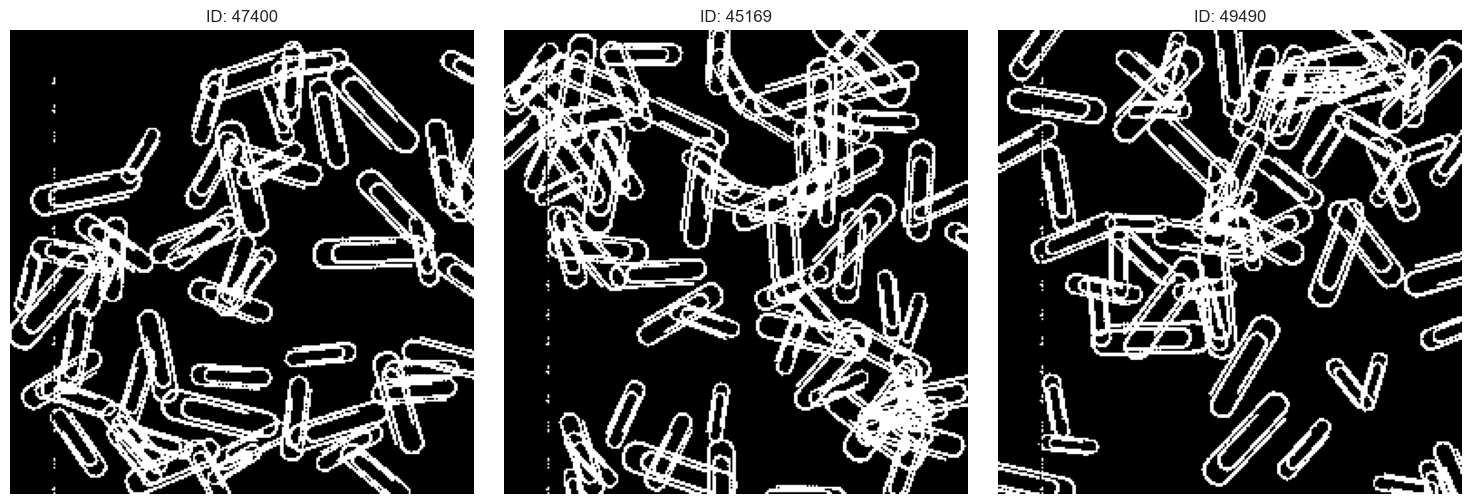

In [18]:
# Seleccionar 3 √≠ndices aleatorios
indices = random.sample(range(X_test.shape[0]), 3)

# Visualizar las im√°genes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, idx in enumerate(indices):
    axes[i].imshow(X_test[idx].reshape(256, 256), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'ID: {ids[idx]}')

plt.tight_layout()
plt.show()


In [19]:
# Validar im√°genes
print("Forma de X_train:", X_train.shape)
print("Rango de valores (m√≠nimo y m√°ximo):", X_train.min(), X_train.max())

# Validar etiquetas
print("Forma de y_train:", y_train.shape)
print("Ejemplos de y_train:", y_train[:5])


Forma de X_train: (12000, 256, 256, 1)
Rango de valores (m√≠nimo y m√°ximo): 0.0 1.0
Forma de y_train: (12000,)
Ejemplos de y_train: [38 75 20 18 66]


In [20]:
# Validar Im√°genes de Validaci√≥n
print("Forma de X_val:", X_val.shape)
print("Rango de valores en X_val (m√≠nimo y m√°ximo):", X_val.min(), X_val.max())

# Validar Etiquetas de Validaci√≥n
print("Forma de y_val:", y_val.shape)
print("Ejemplos de y_val:", y_val[:5])


Forma de X_val: (3000, 256, 256, 1)
Rango de valores en X_val (m√≠nimo y m√°ximo): 0.0 1.0
Forma de y_val: (3000,)
Ejemplos de y_val: [46 17 22 45 65]


In [21]:
# Validar Im√°genes de Prueba
print("Forma de X_test:", X_test.shape)
print("Rango de valores en X_test (m√≠nimo y m√°ximo):", X_test.min(), X_test.max())

# Validar IDs de Prueba
print("N√∫mero de IDs:", len(ids))
print("Ejemplos de IDs:", ids[:5])


Forma de X_test: (5000, 256, 256, 1)
Rango de valores en X_test (m√≠nimo y m√°ximo): 0.0 1.0
N√∫mero de IDs: 5000
Ejemplos de IDs: [np.int64(45001), np.int64(45002), np.int64(45003), np.int64(45004), np.int64(45005)]


In [34]:
# Importar librer√≠as necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir la CNN Personalizada
modelo = Sequential([
    # Primera Capa Convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Segunda Capa Convolucional
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Tercera Capa Convolucional
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Cuarta Capa Convolucional
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Capas Densas
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Salida para regresi√≥n
])

# Compilar el modelo
modelo.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Mostrar resumen del modelo
modelo.summary()


Model: "sequential_4"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_10 (Conv2D)              ‚îÇ (None, 256, 256, 32)   ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_6           ‚îÇ (None, 256, 256, 32)   ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_10 (MaxPooling2D) ‚îÇ (None, 128, 128, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_14 (Dropout)            ‚îÇ (None, 128, 128, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_11 (Conv2D)              ‚îÇ (None, 128, 128, 64)   ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_7           ‚îÇ (None, 128, 128, 64)   ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_11 (MaxPooling2D) ‚îÇ (None, 64, 64, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_15 (Dropout)            ‚îÇ (None, 64, 64, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_12 (Conv2D)              ‚îÇ (None, 64, 64, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_8           ‚îÇ (None, 64, 64, 128)    ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_12 (MaxPooling2D) ‚îÇ (None, 32, 32, 128)   

 Total params: 8,778,625 (33.49 MB)

 Trainable params: 8,777,665 (33.48 MB)

 Non-trainable params: 960 (3.75 KB)

In [35]:
# EarlyStopping para detener el entrenamiento si no hay mejora
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau para ajustar la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


In [36]:
# Entrenar el modelo
historial = modelo.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



Epoch 1/30
  9/188 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9:39 3s/step - loss: 7856.0957 - root_mean_squared_error: 85.3750

KeyboardInterrupt: 

In [ ]:
# Evaluar el Modelo
p√©rdida, rmse = modelo.evaluate(X_val, y_val)
print(f"üîπ RMSE en validaci√≥n: {rmse}")

94/94 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 44ms/step - loss: 4.1070 - root_mean_squared_error: 2.0262
üîπ RMSE en validaci√≥n: 2.021034002304077


In [130]:
# Curvas de Entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(historial.history['loss'], label='P√©rdida Entrenamiento')
plt.plot(historial.history['val_loss'], label='P√©rdida Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.title('Curvas de Entrenamiento y Validaci√≥n')
plt.legend()
plt.show()

In [131]:
# Predecir en el conjunto de validaci√≥n
y_pred = modelo.predict(X_val).flatten()

# Crear un DataFrame para comparar
df_resultados_val = pd.DataFrame({'Real': y_val, 'Predicci√≥n': y_pred})

# Visualizar la comparaci√≥n
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_resultados_val, x='Real', y='Predicci√≥n', color='skyblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparaci√≥n de Valores Reales vs Predicciones')
plt.show()


94/94 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 40ms/step


In [132]:
# Predicciones en el conjunto de prueba
predicciones_test = modelo.predict(X_test).flatten()
predicciones_test_int = np.round(predicciones_test).astype(int)

# Crear DataFrame para la submisi√≥n
df_submission = pd.DataFrame({
    'id': ids,
    'clip_count': predicciones_test_int
})

# Guardar el archivo CSV
df_submission.to_csv('submission.csv', index=False)
print("Archivo de submisi√≥n generado correctamente como 'submission.csv'")

157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 40ms/step
‚úÖ ¬°Predicciones guardadas en submission.csv!


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, predicciones_test_int, color='skyblue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
plt.title('Valores Reales vs Predicciones Enteras')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Enteras')
plt.show()

In [ ]:
# Guardar el modelo en formato .keras
modelo.save('modelo_clip_counting.keras')

print("¬°El modelo ha sido guardado correctamente en formato .keras!")

‚úÖ ¬°El modelo ha sido guardado correctamente en formato .keras!
